# Keras MNIST - RNN

We'll run through the MNIST data set using a recurrent neural network.

In [13]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

import tensorflow as tf
import keras 

from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense, LSTM, Input, TimeDistributed
from keras.optimizers import SGD, Adadelta, RMSprop
from keras.losses import categorical_crossentropy
from keras import backend as K

%matplotlib inline

Load, reshape, retype, and scale the data

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshapes data to 4D for Hierarchical RNN
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Re-scaling to 0-1
x_train /= 255
x_test /= 255

# One-hot encodes the target
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

print('x_train shape: ', x_train.shape)
print('Training samples: ', x_train.shape[0])
print('Testing samples: ', x_test.shape[0])

x_train shape:  (60000, 28, 28, 1)
Training samples:  60000
Testing samples:  10000


Model setup

In [12]:
# Training parameters
batch_size = 64 
num_classes = 10 
epochs = 3 

# Embedding dimensions
row_hidden = 32 
col_hidden = 32

row, col, pixel = x_train.shape[1:]

# 4D input
x = Input(shape=(row, col, pixel))

Model architecture

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 82s 1ms/step - loss: 1.0236 - acc: 0.6510 - val_loss: 0.5564 - val_acc: 0.8162
Epoch 2/3
60000/60000 [==============================] - 84s 1ms/step - loss: 0.4041 - acc: 0.8725 - val_loss: 0.3312 - val_acc: 0.8966
Epoch 3/3
60000/60000 [==============================] - 83s 1ms/step - loss: 0.2571 - acc: 0.9220 - val_loss: 0.2493 - val_acc: 0.9216


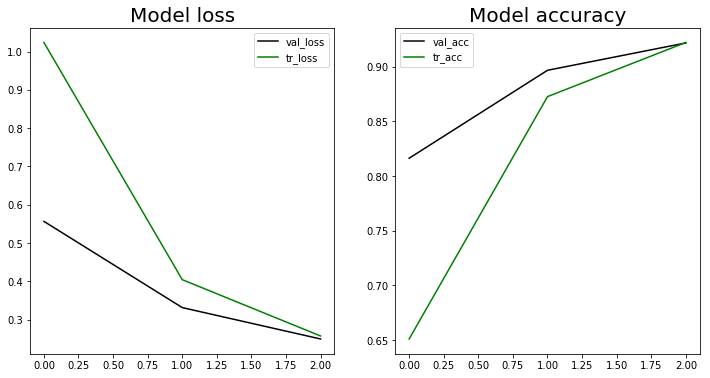

Test loss:  0.24925785632133485
Test accuracy:  0.9216


In [14]:
# Encodes row of pixels using TimeDistributed wrapper
encoded_rows = TimeDistributed(LSTM(row_hidden))(x)

# Encodes columns of encoded rows
encoded_columns = LSTM(col_hidden)(encoded_rows)

# Model architecture
prediction = Dense(num_classes, activation='softmax')(encoded_columns)
model = Model(x, prediction)
model.compile(loss='categorical_crossentropy', 
              optimizer='rmsprop', 
              metrics=['accuracy'])

# Training
history = model.fit(x_train,
                    y_train,
                    batch_size=batch_size, 
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

# Evaluation
scores = model.evaluate(x_test, y_test, verbose=0)

# Plotting
RNN = pd.DataFrame({
    'val_loss': history.history['val_loss'],
    'val_acc': history.history['val_acc'],
    'tr_loss': history.history['loss'],
    'tr_acc': history.history['acc']
})

plt.figure(figsize=(12,6))

plt.subplot(121)
plt.plot(RNN.index, RNN['val_loss'], color='k')
plt.plot(RNN.index, RNN['tr_loss'], color='g')
plt.title('Model loss', size = 20)
plt.legend()

plt.subplot(122)
plt.plot(RNN.index, RNN['val_acc'], color='k')
plt.plot(RNN.index, RNN['tr_acc'], color='g')
plt.title('Model accuracy', size = 20)
plt.legend()

plt.show()
print('Test loss: ', scores[0])
print('Test accuracy: ', scores[1])